# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?id=524901&appid={weather_api_key}&units=metric" #&units=metric

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data                             #q={city}, {country}&appid={api_key}"
        city_weather = requests.get(citY-url).json()                                                #f"http://api.openweathermap.org/data/2.5/weather?"q={city},{country}&appid=weather_api_key

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
City not found. Skipping...
Processing Record 2 of Set 1 | bethel
City not found. Skipping...
Processing Record 3 of Set 1 | axim
City not found. Skipping...
Processing Record 4 of Set 1 | rudnya
City not found. Skipping...
Processing Record 5 of Set 1 | kitaibaraki
City not found. Skipping...
Processing Record 6 of Set 1 | kingston
City not found. Skipping...
Processing Record 7 of Set 1 | rawai
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
City not found. Skipping...
Processing Record 9 of Set 1 | grytviken
City not found. Skipping...
Processing Record 10 of Set 1 | waitangi
City not found. Skipping...
Processing Record 11 of Set 1 | bubaque
City not found. Skipping...
Processing Record 12 of Set 1 | whitehorse
City not found. Skipping...
Processing Record 13 of Set 1 | saint-pierre
City not found. Skipping...
Processing Record 14 of Set 1 | nova sintra
City no

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)      ##should date:'pd.to_datetime(date, unit="s")?
                                              #In theory, couldn't I have also done city_data_df = pd.DataFrame(city_data)???
# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [46]:
# Display sample data
city_data_df.head()

""


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [56]:
# Build scatter plot for latitude vs. temperature                  #Alt code
x_values = city_data_df['Lat']                                     #x_values = city_data_df['Lat']  
y_values = city_data_df['Max Temp']                                #y_values = city_data_df['Max Temp'] 
plt.scatter(x_values, y_values)                                    #plt.scatter(lats, temps,edgecolor='black', linewidths=1, marker='o', alpha=0.5)     
                                                                   #plt.title('City Max Latitude vs. Temperature (2024-06-17)')
# Incorporate the other graph properties                           #plt.xlabel('Lat')                                                                        #
plt.title('City Max Latitude vs. Temperature (2024-06-17)')        #plt.ylabel('Max Temp')
plt.xlabel('Lat')                                                  #plt.savefig("output_data/Fig1.png")
plt.ylabel('Max Temp')                                             #plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")       

# Show plot
plt.show()

KeyError: 'Lat'

#### Latitude Vs. Humidity

In [57]:
# Build the scatter plots for latitude vs. humidity             
x_values = city_data_df['Lat']                                      
y_values = city_data_df['Humidity']                                 
plt.scatter(x_values, y_values)   

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-06-17)')        
plt.xlabel('Lat')                                           
plt.ylabel('Humidity')  

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

KeyError: 'Lat'

#### Latitude Vs. Cloudiness

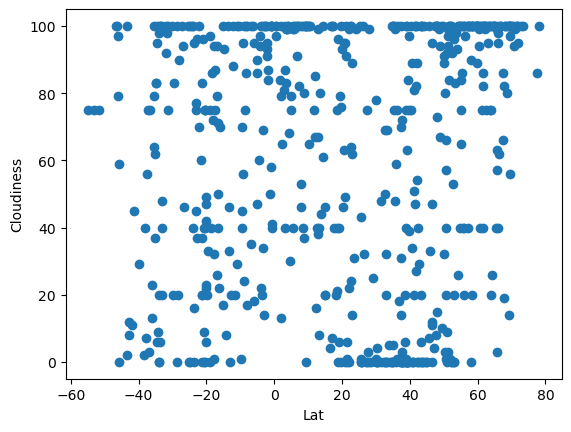

In [44]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [54]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

KeyError: 'Lat'

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#x and y variables for the scatterplot's x and y axises
x = city_weather['Lat')]
y = city_weather['Max Temp')]

#Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

#Print caluculations of the line regression
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

#y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)['Max Temp']

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_weather['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
northern_hemi_df = city_weather['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


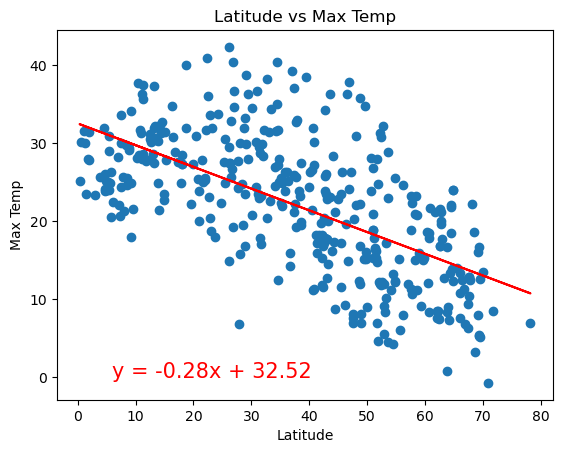

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
plt.scatter(x,y)
plt.plot(x, regress_values, "r-")

#Annotate lin. regress.
plt.annotate(lin_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.6720220238897325


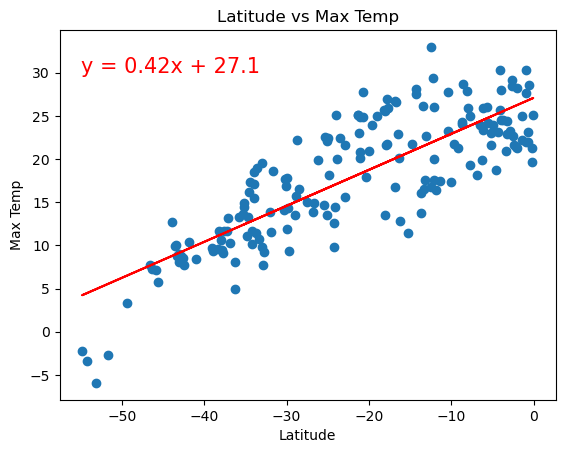

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Tem']
plt.scatter(x,y)
plt.plot(x, regress_values, "r-")

#Annotate lin. regress.
plt.annotate(lin_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: Northern Hemisphere r^2: has a moderate relationship between temperature and latitude. This means that about 39.4% covers the model, and some of the variability can be explained. While Southern Hemisphere r^2: has a strong relationship between temperature and latitude. This means that about 67.2%, which indicates a moderate to strong relationship. And that the independent variable can explain the variability of the dependent variable.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


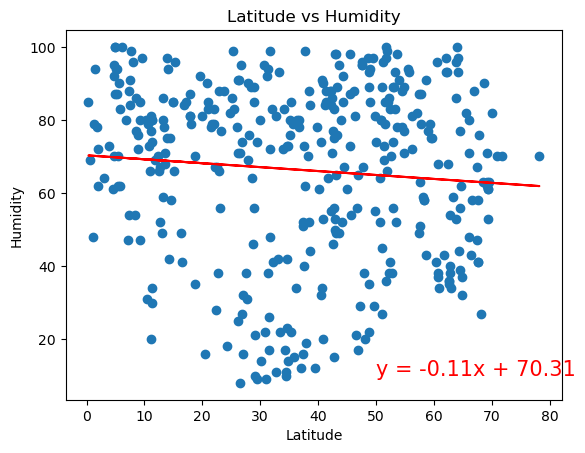

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.00014367159540169783


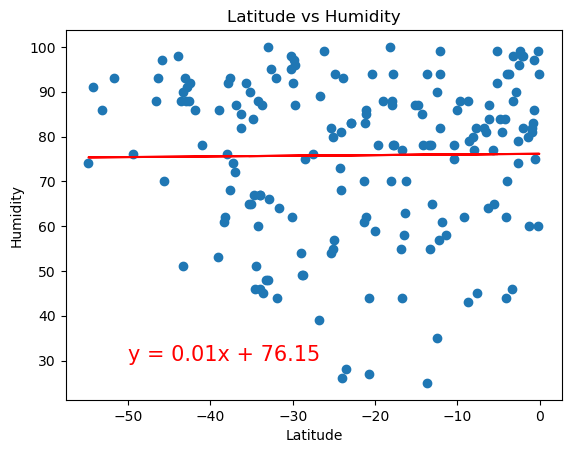

In [23]:
# Southern Hemisphere
 Southern Hemisphere for  lat vs humidity
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere r^2: has a weak relationship between temperature and latitude. This means that 0.7% does not cover the model. Southern Hemisphere r^2: has a weak relationship. This means that the model is not covered. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


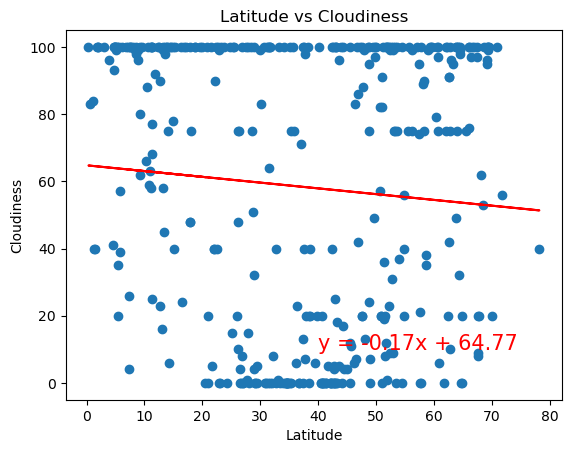

In [19]:
#Northern hemisphere latitude and cloudiness
#Linear regression on Northernn Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.018616831531634456


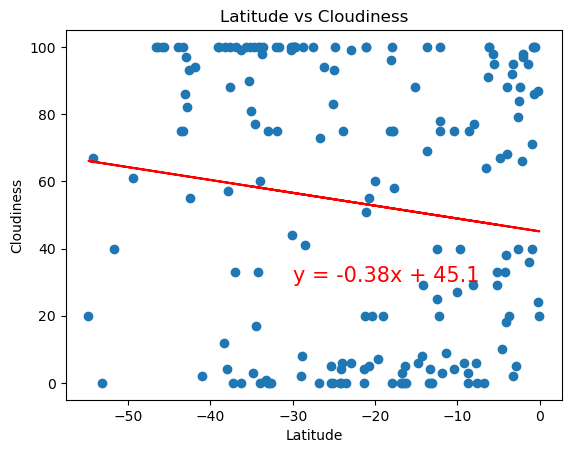

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere r^2: has a moderate relationship between temperature and latitude. This means that some of the the model. Southern Hemisphere r^2: has a moderate relationship. This means that some of the model is covered. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


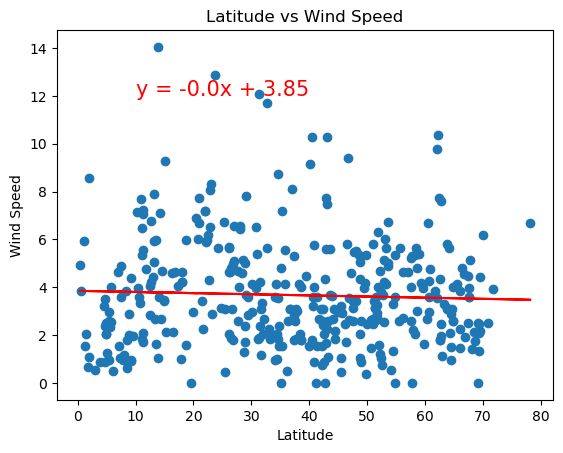

In [21]:
#Northern Hemisphere for  lat vs wind speed
# Linear regression on Northern Hemisphere for lat vs wind speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.06495869418886388


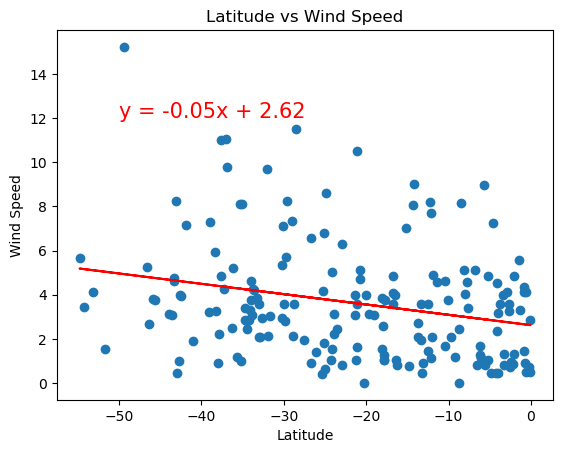

In [22]:
# Southern Hemisphere for  lat vs wind speed
# Linear regression on Northern Hemisphere for lat vs wind speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r^2 value is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** Northern Hemisphere r^2 and Southern Hemisphere r^2: have some coverage of the model.